**Ensemble Learning:**
multiple models trained to sove the same problem and combined to get better results.

the etchnique is to reduce high bias/vaiance of weak learnenrs by combining several of them in order to create a strong model.

**MAX VOTING:** used for classifictaion probs , prediction by each model considered as a vote and the prediction from majority of the models are used as final predictions (MODE).

**AVERGAING:** used for regression, the multiple predictions of differnt models are summed and then divided by the total num of prediction (AVERAGE).



In [2]:
# averaging
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
lr = LogisticRegression()

knn.fit(x_train,y_train)
dt.fit(x_train,y_train)
lr.fit(x_train,y_train)

pred1 = knn.predict(x_test)
pred2 = dt.predict(x_test)
pred3 = lr.predict(x_test)

avg_pred = (pred1+pred2+pred3)/3

In [ ]:
# max voting
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.stats import mode

knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
lr = LogisticRegression()

knn.fit(x_train,y_train)
dt.fit(x_train,y_train)
lr.fit(x_train,y_train)

pred1 = knn.predict(x_test)
pred2 = dt.predict(x_test)
pred3 = lr.predict(x_test)

preds = np.array([pred1,pred2,pred3])
final_pred , _ = mode(preds,axis=0)
final_pred = final_pred.flatten()

In [ ]:
# voting classifier using sklearn
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

model1 = LogisticRegression(random_state=1)
model2 = DecisionTreeClassifier(random_state=1)
estimators = [('lr',model1),('dt',model2)]

# hard vote
model = VotingClassifier(estimators=estimators,voting='hard')
model.fit(x_train,y_train)
model.score(x_test,y_test)


# soft vote
model = VotingClassifier(estimators=estimators,voting='soft')
model.fit(x_train,y_train)
model.score(x_test,y_test)



**Bagging:** bootstrapping is one of the techniques where the original data is divided into subsets with replacement.

1. multiple subsets from original with replacement
2. a weak model created on each subset
3. models run in parallel independently
4. final pred = combine preds of all models

model = BaggingClassifier(DecisionTreeClassifier(random_state=1))

**Boosting:** sequential process , where each model attempts to correct the errors of the prev models.

XGBoost and
AdaBoost

1. Initially, all observations in the dataset are given equal weights.
2. A model is built on a subset of data.
3. Using this model. predictions are made on the whole dataset.
4. Errors are calculated by comparing the predictions and actual values.
5. While creating the next model, higher weights are given to the data points which were
predicted incorrectly.
6. Weights can be determined using the error value. For instance, higher the error more is the
weight assigned to the observation.
7. This process is repeated until the error function does not change, or the maximum limit of the
number of estimators is reached.

**TASK 1**

In [16]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [17]:
df.shape

(1025, 14)

In [18]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [20]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [21]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [24]:
df.duplicated().sum()

np.int64(723)

In [25]:
print(df[df.duplicated()])

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
15     34    0   1       118   210    0        1      192      0      0.7   
31     50    0   1       120   244    0        1      162      0      1.1   
43     46    1   0       120   249    0        0      144      0      0.8   
55     55    1   0       140   217    0        1      111      1      5.6   
61     66    0   2       146   278    0        0      152      0      0.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
15        2   0     2       1  
31        2

In [26]:
df['is_duplicate'] = df.duplicated()


In [27]:
df = df.drop_duplicates(keep='first')

In [29]:
df['target'].value_counts()

,count
target,
1,328
0,276


In [31]:
df.select_dtypes(include=['object','category'])

""
0
1
2
3
4
...
955
962
964
992


No charts were generated by quickchart


no empty records, categorical feature, or duplicate records found to be dealt with.

In [34]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000
mean,54.420530,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.040464,0.466039,1.031188,17.548825,51.710558,0.356390,0.525591,22.884528,0.469806,1.160489,0.615763,1.005913,0.612517,0.498556
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.500000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [32]:
correlation = df.corr()

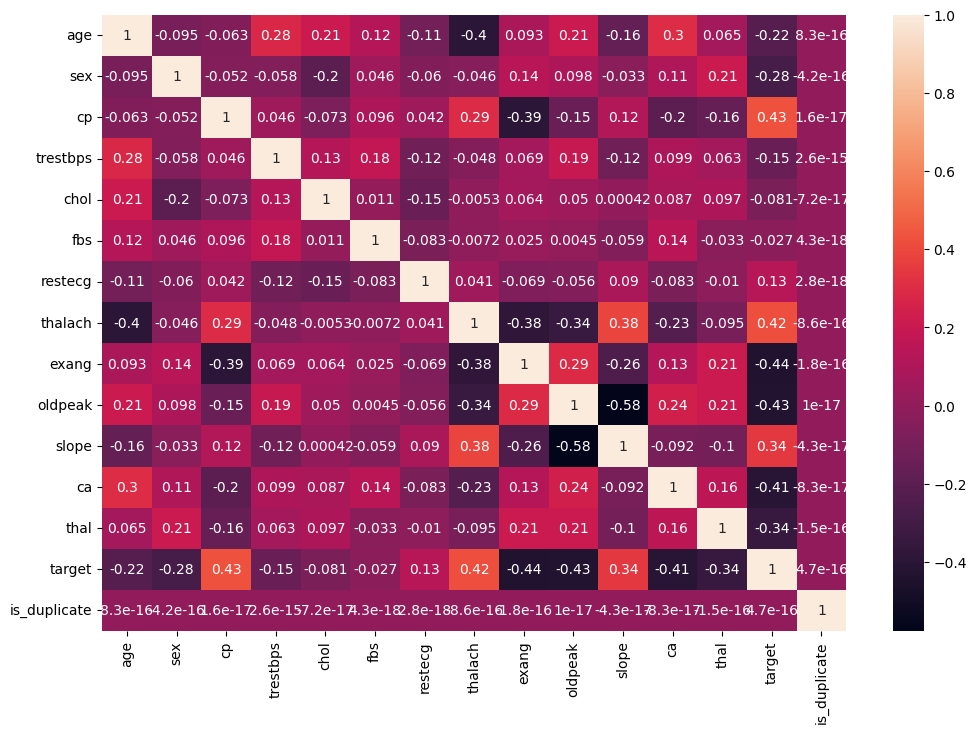

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=True)
plt.show()

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
x = df.drop('target',axis=1)
y = df['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.7,random_state=0)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [49]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

ada = AdaBoostClassifier(random_state=1)
xgb = XGBClassifier(random_state=1)
rf = RandomForestClassifier(random_state=1)

#ada boost
ada.fit(x_train_scaled,y_train)
ada_pred = ada.predict(x_test_scaled)
print(f"\nAda Testing acc: {accuracy_score(y_test,ada_pred):.2f}")
print(f"Ada training acc: {ada.score(x_train_scaled,y_train):.2f}")

# xg boost
xgb.fit(x_train_scaled,y_train)
xgb_pred = xgb.predict(x_test_scaled)
print(f"\nXGB testing acc:{accuracy_score(y_test,xgb_pred):.2f}")
print(f"XGB training acc: {xgb.score(x_train_scaled,y_train):.2f}")

#random forest
rf.fit(x_train_scaled,y_train)
rf_pred = rf.predict(x_test_scaled)
print(f"\nRF testing acc: {accuracy_score(y_test,rf_pred):.2f}")
print(f"RF training acc: {rf.score(x_train_scaled,y_train):.2f}")


Ada Testing acc: 0.76
Ada training acc: 0.94

XGB testing acc:0.81
XGB training acc: 1.00

RF testing acc: 0.80
RF training acc: 1.00


All three algorithms show higher training accuracy than testing accuracy, indicating overfitting to some extent.

AdaBoost generalizes slightly better (smaller gap) but has the lowest testing accuracy.

XGBoost and Random Forest achieve perfect training accuracy but have similar test performance (~0.80), showing they might be overfitting but still perform better on unseen data.

**TASK 2**

In [62]:
from sklearn.model_selection import train_test_split
x_selected = df[['restecg','oldpeak']]
y = df['target']

x_sel_train,x_sel_test,y_train,y_test = train_test_split(x_selected,y,test_size=0.2,random_state=0)

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

dt = DecisionTreeClassifier(random_state=1)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state=1)
rf = RandomForestClassifier(random_state=1)

estimators = [('DT',dt),('KNN',knn),('XGB',xgb),('RF',rf)]

# hard vote
model = VotingClassifier(estimators=estimators,voting='hard')
model.fit(x_sel_train,y_train)
pred=model.predict(x_sel_test)
print(f"hard test acc: {accuracy_score(y_test,pred):.2f}")
print(f"hard training acc: {model.score(x_sel_train,y_train):.2f}")

# soft vote
model2 = VotingClassifier(estimators=estimators,voting='soft')
model2.fit(x_sel_train,y_train)
pred2 = model2.predict(x_sel_test)
print(f"\nsoft test acc: {accuracy_score(y_test,pred2):.2f}")
print(f"soft training acc: {model2.score(x_sel_train,y_train):.2f}")

hard test acc: 0.72
hard training acc: 0.76

soft test acc: 0.72
soft training acc: 0.77


After applying both hard and soft voting ensembles, we observed almost identical test accuracies (0.72). Soft voting achieved a slightly higher training accuracy (0.77) compared to hard voting (0.76), indicating it captured slightly more information from the base classifiers. However, due to similar generalization performance, we can conclude that both voting strategies perform equally well on this dataset.



In [66]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=1)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state=1)
rf = RandomForestClassifier(random_state=1)

estimators = [('DT', dt), ('KNN', knn), ('XGB', xgb), ('RF', rf)]

#  diff weight combinations
weights_list = [
    [1, 1, 1, 1],
    [2, 1, 1, 1],
    [1, 2, 1, 1],
    [1, 1, 2, 1],
    [1, 1, 1, 2],
    [2, 1, 2, 1],
]

for weights in weights_list:
    model = VotingClassifier(estimators=estimators, voting='hard', weights=weights)
    model.fit(x_sel_train, y_train)
    y_pred = model.predict(x_sel_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Weights {weights} -> Test Accuracy: {acc:.2f}")


Weights [1, 1, 1, 1] -> Test Accuracy: 0.72
Weights [2, 1, 1, 1] -> Test Accuracy: 0.72
Weights [1, 2, 1, 1] -> Test Accuracy: 0.72
Weights [1, 1, 2, 1] -> Test Accuracy: 0.72
Weights [1, 1, 1, 2] -> Test Accuracy: 0.72
Weights [2, 1, 2, 1] -> Test Accuracy: 0.72


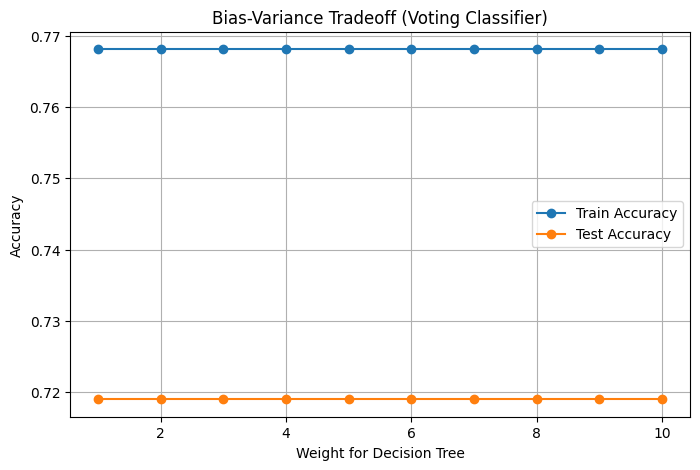

In [67]:
import matplotlib.pyplot as plt

train_scores = []
test_scores = []
weights = range(1, 11)

for w in weights:
    model = VotingClassifier(estimators=estimators, voting='soft', weights=[w, 1, 1, 1])
    model.fit(x_sel_train, y_train)
    train_scores.append(model.score(x_sel_train, y_train))
    test_scores.append(model.score(x_sel_test, y_test))

plt.figure(figsize=(8, 5))
plt.plot(weights, train_scores, label='Train Accuracy', marker='o')
plt.plot(weights, test_scores, label='Test Accuracy', marker='o')
plt.xlabel("Weight for Decision Tree")
plt.ylabel("Accuracy")
plt.title("Bias-Variance Tradeoff")
plt.legend()
plt.grid(True)
plt.show()


**task 3**

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
x = df[['restecg','chol']]
y = df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

ada = AdaBoostClassifier(random_state=1)
rf = RandomForestClassifier(random_state=1)

# ada
ada.fit(x_train,y_train)
pred = ada.predict(x_test)
ada_training_acc = ada.score(x_train,y_train)
ada_testing_acc=accuracy_score(y_test,pred)
print(f"ADA training: {ada_training_acc:.2f}")
print(f"ADA testing: {ada_testing_acc:.2f}")

# rf
rf.fit(x_train,y_train)
pred2 = rf.predict(x_test)
rf_training_acc = rf.score(x_train,y_train)
rf_testing_acc = accuracy_score(y_test,pred2)
print(f"\nRF training: {rf_training_acc:.2f}")
print(f"RF testing: {rf_testing_acc:.2f}")

# hard voting
estimators = [('ADA',ada),('RF',rf)]
model = VotingClassifier(estimators=estimators,voting='hard')
model.fit(x_train,y_train)
model_pred = model.predict(x_test)
hard_training_acc=model.score(x_train,y_train)
hard_testing_acc=accuracy_score(y_test,model_pred)
print(f"\nhard training: {hard_training_acc:.2f}")
print(f"hard testing: {hard_testing_acc:.2f}")


# soft voting
model2 = VotingClassifier(estimators=estimators,voting='soft')
model2.fit(x_train,y_train)
model2_pred = model.predict(x_test)
soft_training_acc= model2.score(x_train,y_train)
soft_testing_acc=accuracy_score(y_test,model2_pred)
print(f"\nsoft training: {soft_training_acc:.2f}")
print(f"soft testing: {soft_testing_acc:.2f}")

ADA training: 0.63
ADA testing: 0.58

RF training: 0.88
RF testing: 0.77

hard training: 0.75
hard testing: 0.68

soft training: 0.88
soft testing: 0.68


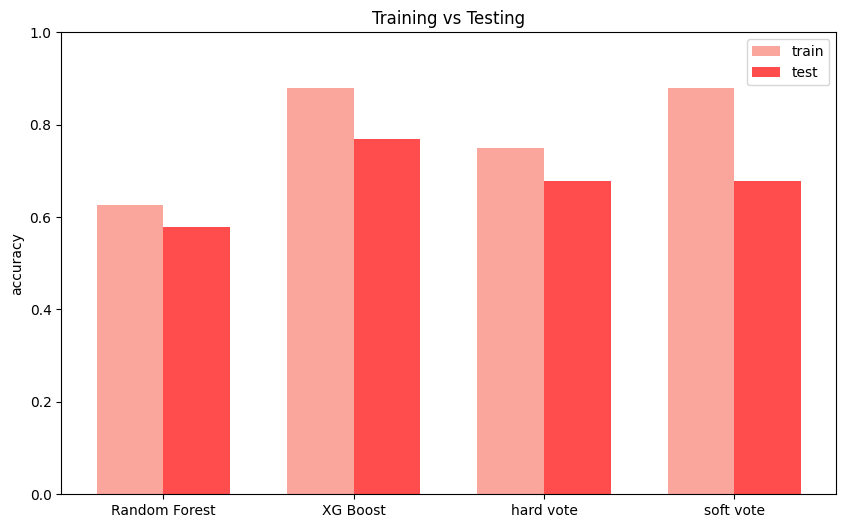

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
models = ['Random Forest','XG Boost','hard vote','soft vote']
train_acc = [ada_training_acc,rf_training_acc,hard_training_acc,soft_training_acc]
test_acc = [ada_testing_acc,rf_testing_acc,hard_testing_acc,soft_testing_acc]

plt.figure(figsize=(10,6))
x = range(len(models))
bar_width = 0.35
plt.bar(x,train_acc,width=bar_width,color='salmon',alpha=0.7,label='train')
plt.bar([i + bar_width for i in x],test_acc,width=bar_width,color='red',alpha=0.7,label='test')
plt.xticks([i + bar_width/2 for i in x], models)
plt.ylim(0,1)
plt.ylabel('accuracy')
plt.title('Training vs Testing')
plt.legend()
plt.show()